In [1]:
import numpy as np
import pandas as pd

# Checkout data from ACS for PRL synthpop

In [2]:
# focus on Florida

## TOC #

### list of vars needed

### acs vars we have
###### source: https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2019.pdf

### import data

### merge on households weights

### map ACS vars to our desired vars

### checkout each var

In [3]:
ls /mnt/team/simulation_science/pub/tmp_prl_data/

csv_hus.zip  psam_husa.csv*  psam_husc.csv*
csv_pus.zip  psam_husb.csv*  psam_husd.csv*


# VARS WE WILL NEED

In [4]:
## VARS OF INTEREST --- PERSON FILE

# age
# int
# sex
# binary :P
# race/ethnicity
# non-latino white alone
# non-latino black alone
# non-latino AIAN alone
# non-latino asian alone
# non-latino native hawaiian/other pacific islander
# non-latino multiracial
# latino
# geographic location
# puma level
# household id
# relationship to reference person

In [5]:
## VARS NEEDED -- HH FILE

# household id
# household weight

# VARS WE HAVE FROM ACS

In [6]:
# RELSHIPP Character 2
# Relationship
# 20 .Reference person
# 21 .Opposite-sex husband/wife/spouse
# 22 .Opposite-sex unmarried partner
# 23 .Same-sex husband/wife/spouse
# 24 .Same-sex unmarried partner
# 25 .Biological son or daughter
# 26 .Adopted son or daughter
# 27 .Stepson or stepdaughter
# 28 .Brother or sister
# 29 .Father or mother
# 30 .Grandchild
# 31 .Parent-in-law
# 32 .Son-in-law or daughter-in-law
# 33 .Other relative
# 34 .Roommate or housemate
# 35 .Foster child
# 36 .Other nonrelative
# 37 .Institutionalized group quarters population
# 38 .Noninstitutionalized group quarters population

In [7]:
# HISP Character 2
# Recoded detailed Hispanic origin
# 01 .Not Spanish/Hispanic/Latino
# 02 .Mexican
# 03 .Puerto Rican
# 04 .Cuban
# 05 .Dominican
# 06 .Costa Rican
# 07 .Guatemalan
# 08 .Honduran
# 09 .Nicaraguan
# 10 .Panamanian
# 11 .Salvadoran
# 12 .Other Central American
# 13 .Argentinean
# 14 .Bolivian
# 15 .Chilean
# 16 .Colombian
# 17 .Ecuadorian
# 18 .Paraguayan
# 19 .Peruvian
# 20 .Uruguayan
# 21 .Venezuelan
# 22 .Other South American
# 23 .Spaniard
# 24 .All Other Spanish/Hispanic/Latino

In [8]:
# RAC1P Character 1
# Recoded detailed race code
# 1 .White alone
# 2 .Black or African American alone
# 3 .American Indian alone
# 4 .Alaska Native alone
# 5 .American Indian and Alaska Native tribes specified; or
# .American Indian or Alaska Native, not specified and no other
# .races
# 6 .Asian alone
# 7 .Native Hawaiian and Other Pacific Islander alone
# 8 .Some Other Race alone
# 9 .Two or More Races

In [9]:
# SEX Character 1
# Sex
# 1 .Male
# 2 .Female

# IMPORT DATA

In [10]:
data_dir = "/mnt/team/simulation_science/priv/engineering/prl_data/"

In [11]:
%%time
hh_vars = ["WGTP", "SERIALNO"]
hh_weights = pd.DataFrame()

for file in [f"psam_hus{x}.csv" for x in ["a", "b", "c", "d"]]:
    new = pd.read_csv(data_dir + "Apr_04_2022/" + file, usecols=hh_vars)
    hh_weights = hh_weights.append(new)

<timed exec>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


CPU times: user 26.7 s, sys: 3.45 s, total: 30.2 s
Wall time: 37.1 s


<timed exec>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [13]:
person_var_dict = {
    "SERIALNO": "household_id",
    "PUMA": "puma",
    "ST": "state",
    "AGEP": "age",
    "RELSHIPP": "relation_to_reference_person",
    "SEX": "sex",
    "HISP": "latino",
    "RAC1P": "race",
}

In [14]:
florida_person_path = (
    "/mnt/team/simulation_science/priv/engineering/prl_data/florida/Apr_05_2022/psam_p12.csv"
)

fl_person = pd.read_csv(florida_person_path, usecols=person_var_dict.keys())

/tmp/ipykernel_329510/2920185235.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  fl_person = pd.read_csv(


# MERGE ON HOUSEHOLD WEIGHTS

In [15]:
# make sure all household ids from FL file are in general hh_id file

hh_weights.SERIALNO = hh_weights.SERIALNO.astype(str)
fl_person.SERIALNO = fl_person.SERIALNO.astype(str)

set(fl_person.SERIALNO).difference(set(hh_weights.SERIALNO))

set()

In [16]:
# merge on household weights
fl_person = fl_person.merge(hh_weights, on="SERIALNO")

# rename variables
fl_person = fl_person.rename(columns=person_var_dict)
fl_person = fl_person.rename(columns={"WGTP": "hh_weight"})

In [17]:
hh_weights

,SERIALNO,WGTP
0,2015000000037,14
1,2015000000067,9
2,2015000000090,11
3,2015000000160,15
4,2015000000345,29
...,...,...
1917163,2019HU1410371,3
1917164,2019HU1411359,12
1917165,2019HU1411842,5
1917166,2019HU1412021,9


# MAP ACS VARS TO DESIRED VARS

In [37]:
# map latino to 0 and non-latino to 1
latino_map = {i: 0 for i in fl_person.latino.unique()}
latino_map[1] = 1

# map non latino (==1) to diffeferent races
fl_person["race_eth"] = fl_person.latino.map(latino_map)
fl_person.loc[fl_person.race_eth == 1, "race_eth"] = fl_person.loc[
    fl_person.race_eth == 1,
].race

In [38]:
# label each race/eth
race_eth_map = {
    0: "Latino",
    1: "Non-Latino White alone",
    2: "Non-Latino Black alone",
    3: "Non-Latino AIAN alone",
    4: "Non-Latino AIAN alone",
    5: "Non-Latino AIAN alone",
    6: "Non-Latino Asian alone",
    7: "Non-Latino NHOPI alone",
    8: "Non-Latino Multiracial or Other",
    9: "Non-Latino Multiracial or Other",
}

In [39]:
fl_person.race_eth = fl_person.race_eth.map(race_eth_map)

In [40]:
fl_person = fl_person.drop(columns=["latino", "race"])

In [41]:
sex_map = {1: "Male", 2: "Female"}
fl_person.sex = fl_person.sex.map(sex_map)

In [42]:
fl_person.head()

,household_id,puma,state,age,relation_to_reference_person,sex,hh_weight,race_eth
0,2015000000042,10303,12,66,20,Female,14,Non-Latino White alone
1,2015000000042,10303,12,68,21,Male,14,Non-Latino White alone
2,2015000000042,10303,12,45,25,Male,14,Non-Latino White alone
3,2015000000055,5301,12,82,20,Male,6,Non-Latino White alone
4,2015000000055,5301,12,80,21,Female,6,Non-Latino White alone


In [43]:
relshipp_map = {
    20: "Reference person",
    21: "Opposite-sex husband/wife/spouse",
    22: "Opposite-sex unmarried partner",
    23: "Same-sex husband/wife/spouse",
    24: "Same-sex unmarried partner",
    25: "Biological son or daughter",
    26: "Adopted son or daughter",
    27: "Stepson or stepdaughter",
    28: "Brother or sister",
    29: "Father or mother",
    30: "Grandchild",
    31: "Parent-in-law",
    32: "Son-in-law or daughter-in-law",
    33: "Other relative",
    34: "Roommate or housemate or housemate",
    35: "Foster child",
    36: "Other nonrelative",
    37: "Institutionalized group quarters population",
    38: "Noninstitutionalized group quarters population",
}
fl_person.relation_to_reference_person = fl_person.relation_to_reference_person.map(
    relshipp_map
)

# CHECKOUT EACH VAR

In [44]:
import matplotlib.pyplot as plt

In [45]:
fl_person.head()

,household_id,puma,state,age,relation_to_reference_person,sex,hh_weight,race_eth
0,2015000000042,10303,12,66,Reference person,Female,14,Non-Latino White alone
1,2015000000042,10303,12,68,Opposite-sex husband/wife/spouse,Male,14,Non-Latino White alone
2,2015000000042,10303,12,45,Biological son or daughter,Male,14,Non-Latino White alone
3,2015000000055,5301,12,82,Reference person,Male,6,Non-Latino White alone
4,2015000000055,5301,12,80,Opposite-sex husband/wife/spouse,Female,6,Non-Latino White alone


In [46]:
fl_person.puma.nunique()

151

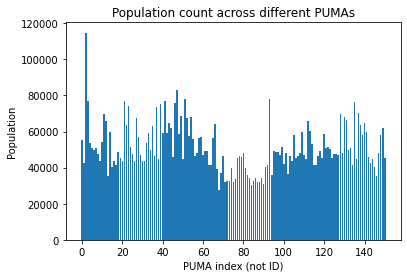

In [47]:
hh_weight_by_puma = fl_person.groupby(["puma", "household_id"]).hh_weight.mean().reset_index()

plt.bar(
    height=hh_weight_by_puma.groupby("puma").hh_weight.sum(),
    x=range(0, hh_weight_by_puma.puma.nunique()),
)
plt.title("Population count across different PUMAs")
plt.ylabel("Population")
plt.xlabel("PUMA index (not ID)")
plt.show()

In [48]:
hist_dt = fl_person.copy()

hist_dt["pp"] = 1

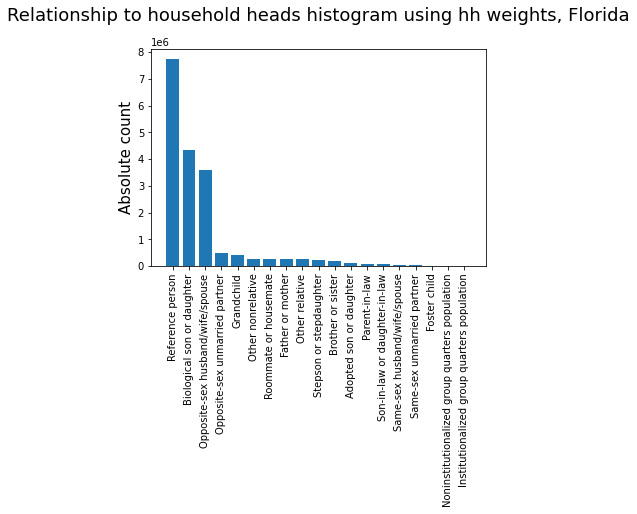

In [51]:
fsize = 15
plt.bar(
    x=hist_dt.groupby("relation_to_reference_person")
    .hh_weight.sum()
    .sort_values(ascending=False)
    .index,
    height=hist_dt.groupby("relation_to_reference_person")
    .hh_weight.sum()
    .sort_values(ascending=False),
)

plt.title(
    "Relationship to household heads histogram using hh weights, Florida",
    fontsize=fsize + 3,
    y=1.1,
)
# plt.xlabel('Age', fontsize = fsize)
plt.ylabel("Absolute count", fontsize=fsize)
plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 45-degrees
plt.show()

/share/code/beatrixh/miniconda/envs/ciff/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


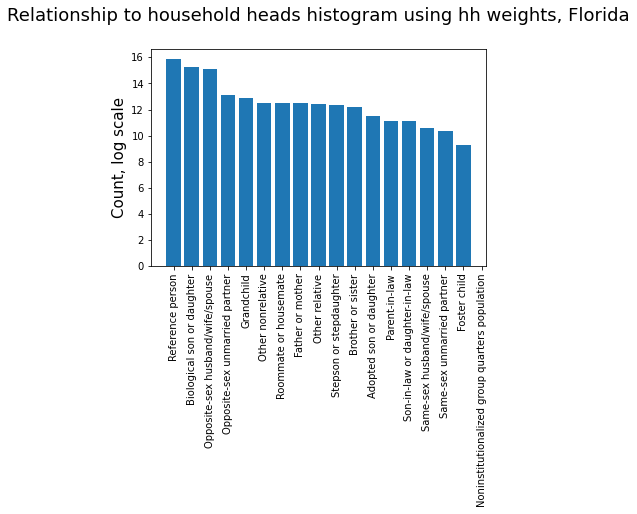

In [52]:
plt.bar(
    x=hist_dt.groupby("relation_to_reference_person")
    .hh_weight.sum()
    .sort_values(ascending=False)
    .index,
    height=np.log(
        hist_dt.groupby("relation_to_reference_person")
        .hh_weight.sum()
        .sort_values(ascending=False)
    ),
)

plt.title(
    "Relationship to household heads histogram using hh weights, Florida",
    fontsize=fsize + 3,
    y=1.1,
)
# plt.xlabel('Age', fontsize = fsize)
plt.ylabel("Count, log scale", fontsize=fsize)
plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [54]:
hist_dt.groupby(["sex"]).hh_weight.sum()

sex
Female    9542739
Male      8787808
Name: hh_weight, dtype: int64

In [55]:
hist_dt.groupby(["sex"]).hh_weight.sum() / hist_dt.hh_weight.sum()

sex
Female    0.520592
Male      0.479408
Name: hh_weight, dtype: float64

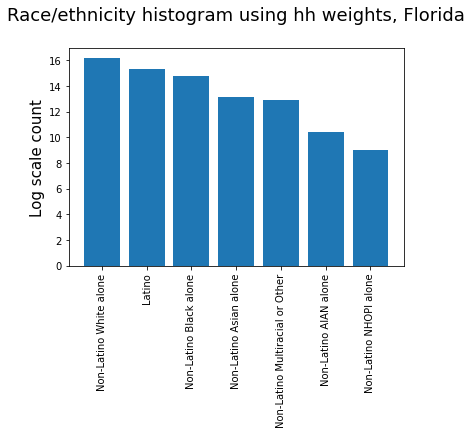

In [56]:
plt.bar(
    x=hist_dt.groupby("race_eth").hh_weight.sum().sort_values(ascending=False).index,
    height=np.log(hist_dt.groupby("race_eth").hh_weight.sum().sort_values(ascending=False)),
)

plt.title("Race/ethnicity histogram using hh weights, Florida", fontsize=fsize + 3, y=1.1)
# plt.xlabel('Age', fontsize = fsize)
plt.ylabel("Log scale count", fontsize=fsize)
plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 45-degrees
plt.show()

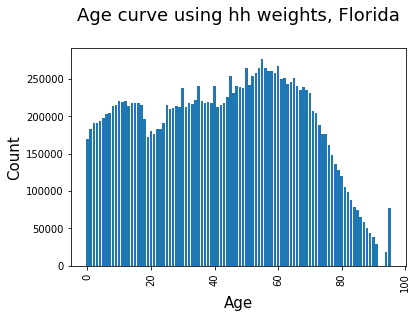

In [57]:
plt.bar(
    x=hist_dt.groupby("age").hh_weight.sum().sort_values(ascending=False).index,
    height=hist_dt.groupby("age").hh_weight.sum().sort_values(ascending=False),
)

plt.title("Age curve using hh weights, Florida", fontsize=fsize + 3, y=1.1)
plt.xlabel("Age", fontsize=fsize)
plt.ylabel("Count", fontsize=fsize)
plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [58]:
hh_weights

,SERIALNO,WGTP
0,2015000000037,14
1,2015000000067,9
2,2015000000090,11
3,2015000000160,15
4,2015000000345,29
...,...,...
1917163,2019HU1410371,3
1917164,2019HU1411359,12
1917165,2019HU1411842,5
1917166,2019HU1412021,9


In [59]:
fl_person

,household_id,puma,state,age,relation_to_reference_person,sex,hh_weight,race_eth
0,2015000000042,10303,12,66,Reference person,Female,14,Non-Latino White alone
1,2015000000042,10303,12,68,Opposite-sex husband/wife/spouse,Male,14,Non-Latino White alone
2,2015000000042,10303,12,45,Biological son or daughter,Male,14,Non-Latino White alone
3,2015000000055,5301,12,82,Reference person,Male,6,Non-Latino White alone
4,2015000000055,5301,12,80,Opposite-sex husband/wife/spouse,Female,6,Non-Latino White alone
...,...,...,...,...,...,...,...,...
998469,2019HU1412413,8101,12,6,Biological son or daughter,Male,14,Non-Latino White alone
998470,2019HU1412413,8101,12,3,Biological son or daughter,Male,14,Non-Latino White alone
998471,2019HU1412447,8616,12,59,Reference person,Male,11,Non-Latino White alone
998472,2019HU1412447,8616,12,57,Opposite-sex husband/wife/spouse,Female,11,Non-Latino White alone
